In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.preprocessing import StandardScaler
warnings.filterwarnings('ignore')

In [2]:
# Set the path to the dataset
datasetspath = "/Users/saransathy/WalshDBA/Capstone"

## Multivehicle Dataset Exploratory Data Analysis

In [3]:
mv_dataset1 = pd.read_pickle(f"{datasetspath}/battery_dataset1_normalised.pkl")
mv_dataset2 = pd.read_pickle(f"{datasetspath}/battery_dataset2_normalised.pkl")
mv_dataset3 = pd.read_pickle(f"{datasetspath}/battery_dataset3_normalised.pkl")
etron_df = pd.read_pickle(f"{datasetspath}/Charge_normalised.pkl")
drive_df = pd.read_pickle(f"{datasetspath}/Drive_normalised.pkl")

In [4]:
for i,df in enumerate([mv_dataset1,mv_dataset2,mv_dataset3]):
    print(f"\nDescription of Multivehicle Dataset - {i+1}")
    print(f"Shape: {df.shape}")
    print("Statistics\n")
    print(df.describe().T)


Description of Multivehicle Dataset - 1
Shape: (80527488, 12)
Statistics

               count          mean           std       min           25%  \
mileage   80527488.0  1.118908e+05  50292.699848  0.000000  81604.617600   
capacity  80527488.0  2.247404e+01     20.134530  0.000000      0.000000   
car       80527488.0  8.595778e+01     54.643977  0.000000     38.000000   
Curr      80527488.0  2.874201e-17      1.000000 -6.713194      0.223118   
SoC       80527488.0  7.089096e-17      1.000000 -4.356352     -0.819052   
Temp      80527488.0  1.817910e-17      1.000000 -4.266119     -0.884375   
Volt      80527488.0 -2.617152e-17      1.000000 -4.952014     -0.906063   
MaxVolt   80527488.0 -6.238817e-15      1.000000 -2.915298     -0.697011   
MinVolt   80527488.0  5.663217e-14      1.000000 -4.016960     -0.907481   
MinTemp   80527488.0  2.610351e-14      1.000000 -7.107226     -0.903439   

                    50%            75%            max  
mileage   115464.201600  147662.

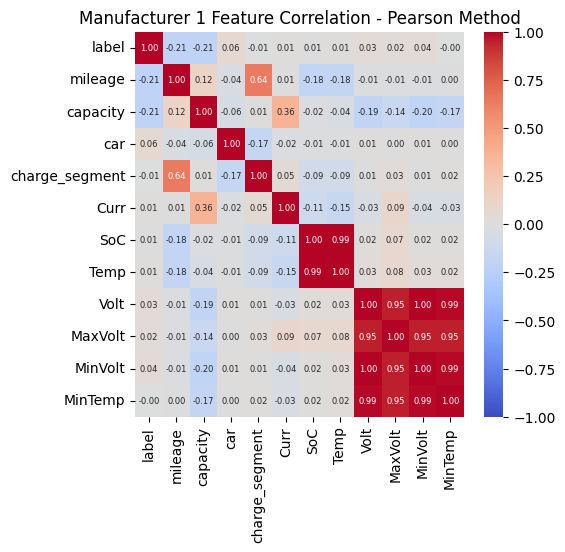

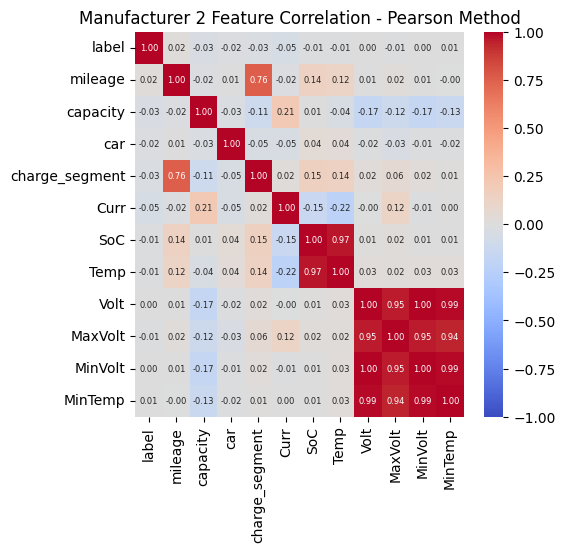

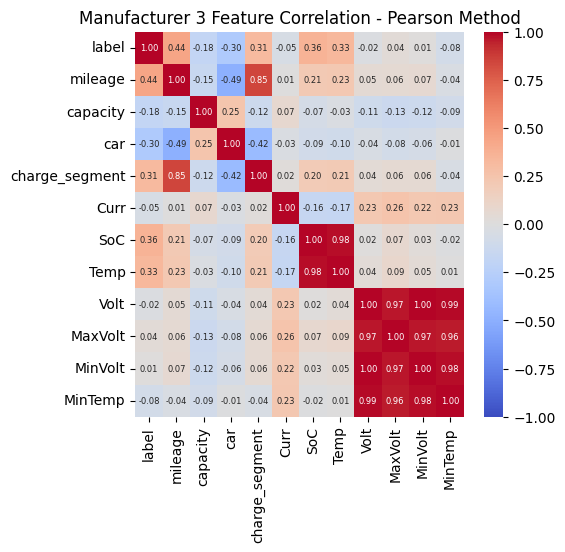

In [5]:
# Understand Correlation between features - Pearson Method
for i,df in enumerate([mv_dataset1,mv_dataset2,mv_dataset3]):
    corr=df.corr(method='pearson')
    # Plot heatmaps for each manufacturer dataset
    plt.figure(figsize=(18, 5))
    plt.subplot(1, 3, i+1)
    sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1, fmt='.2f', annot_kws={"size": 6})
    plt.title(f"Manufacturer {i+1} Feature Correlation - Pearson Method")
plt.show()

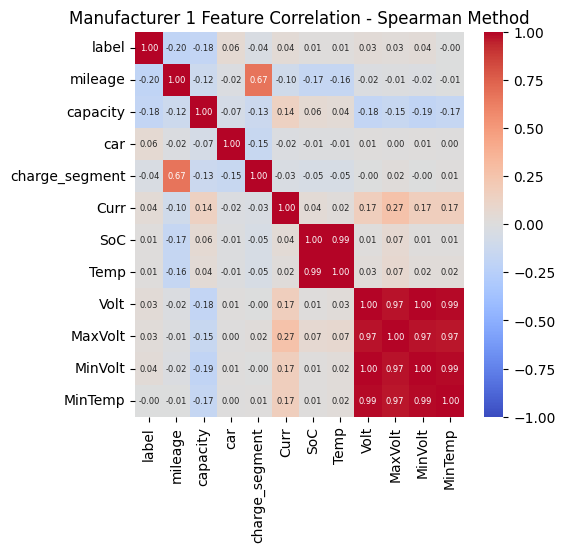

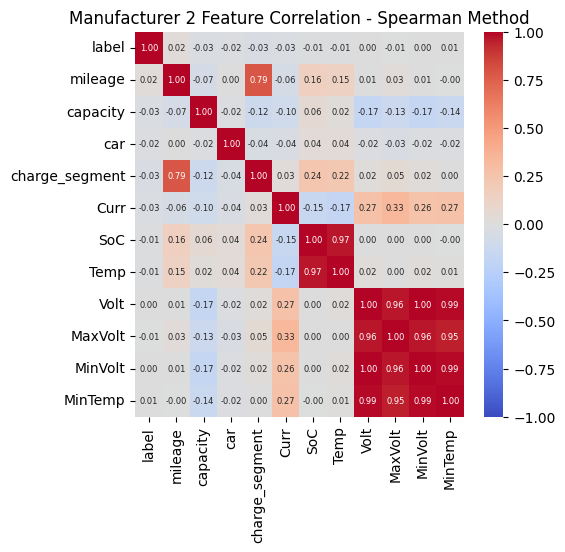

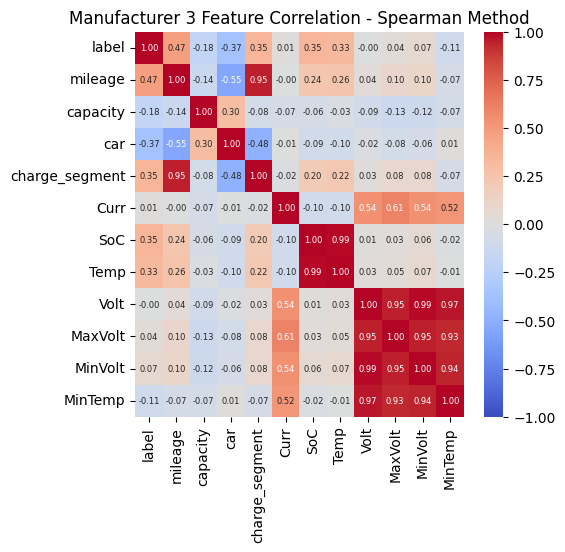

In [6]:
# Understand Correlation between features - Spearman Method
for i,df in enumerate([mv_dataset1,mv_dataset2,mv_dataset3]):
    corr=df.corr(method='spearman')
    # Plot heatmaps for each manufacturer dataset
    plt.figure(figsize=(18, 5))
    plt.subplot(1, 3, i+1)
    sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1, fmt='.2f', annot_kws={"size": 6})
    plt.title(f"Manufacturer {i+1} Feature Correlation - Spearman Method")
plt.show()

In [7]:
# Keeping only Volt and dropping MaxVolt, MinVolt and MinTemp as they are all highly correlated
for df in [mv_dataset1,mv_dataset2,mv_dataset3]:
    df.drop(['MaxVolt','MinVolt','MinTemp'], axis=1, inplace=True)

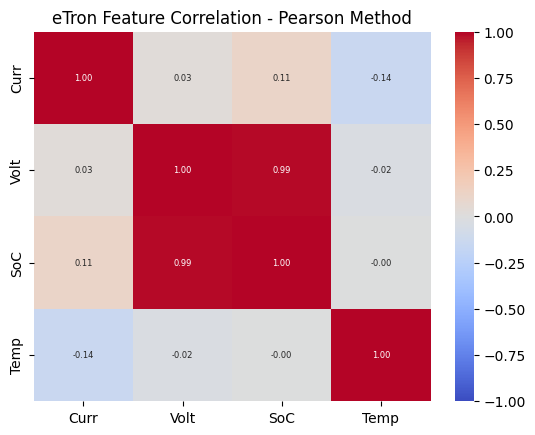

In [8]:
# Correlation in Audi eTron Charge Dataset
corr=etron_df.corr(method='pearson')
# Plot heatmaps for each manufacturer dataset
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1, fmt='.2f', annot_kws={"size": 6})
plt.title("eTron Feature Correlation - Pearson Method")
plt.show()

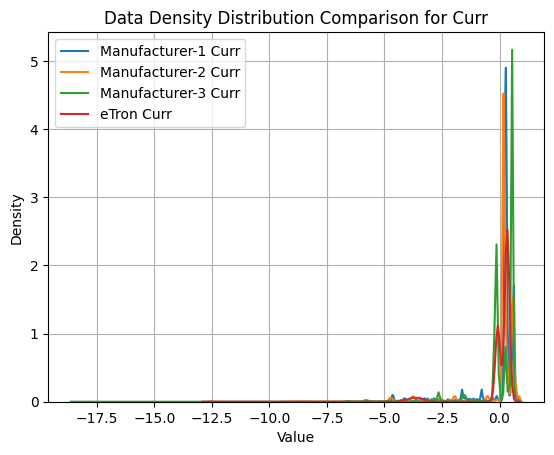

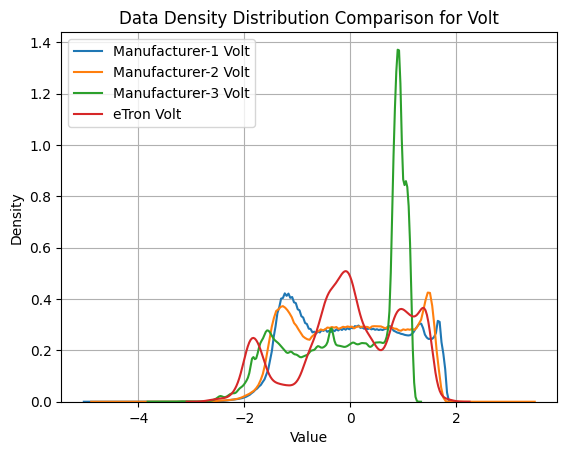

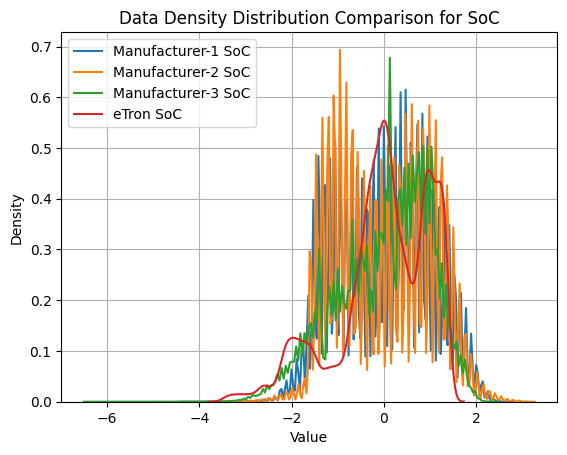

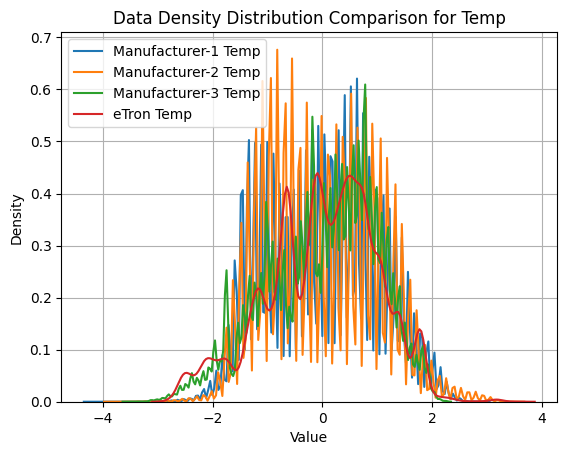

In [9]:
# Understand Distributions
for key in ["Curr","Volt","SoC","Temp"]:
    sns.kdeplot(mv_dataset1[key], label=f"Manufacturer-1 {key}", bw_adjust=1)
    sns.kdeplot(mv_dataset2[key], label=f"Manufacturer-2 {key}", bw_adjust=1)
    sns.kdeplot(mv_dataset3[key], label=f"Manufacturer-3 {key}", bw_adjust=1)
    sns.kdeplot(etron_df[key], label=f"eTron {key}", bw_adjust=1)
    plt.xlabel('Value')
    plt.ylabel('Density')
    plt.title(f"Data Density Distribution Comparison for {key}")
    plt.legend()
    plt.grid(True)
    plt.show()

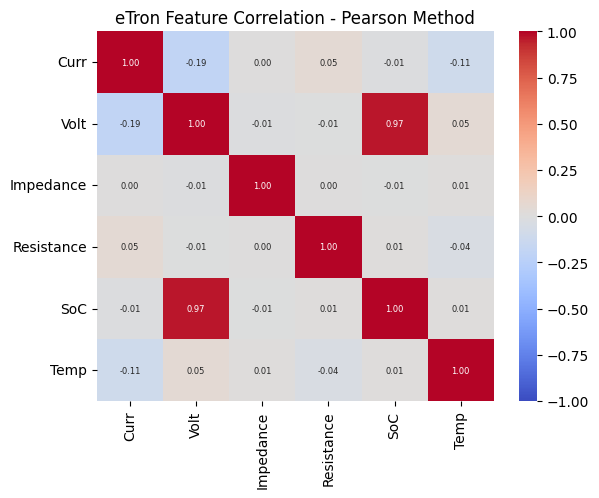

In [10]:
# eTron Driving Behavior Patterns Analysis
# Correlation in Audi eTron Drive Dataset
corr=drive_df.corr(method='pearson')
# Plot heatmaps for each manufacturer dataset
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1, fmt='.2f', annot_kws={"size": 6})
plt.title("eTron Feature Correlation - Pearson Method")
plt.show()

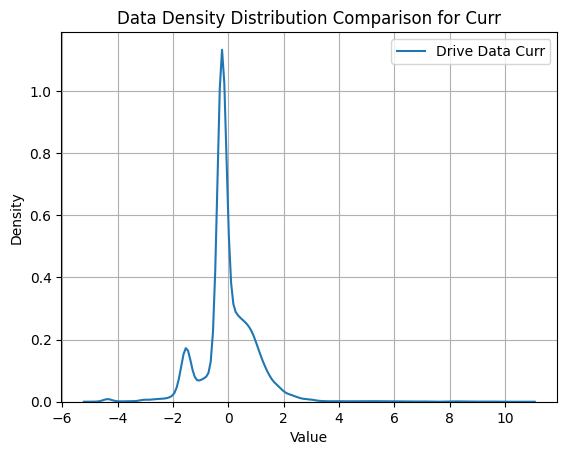

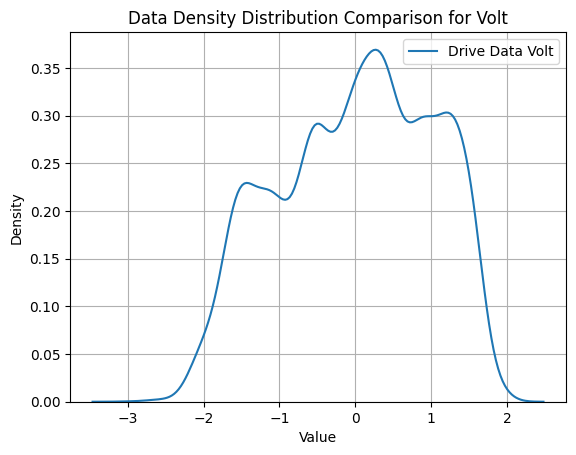

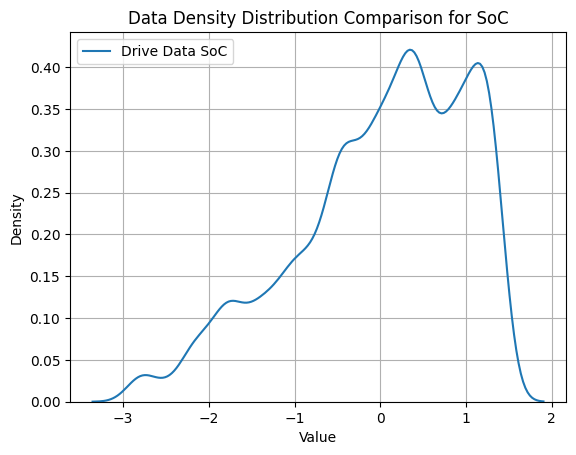

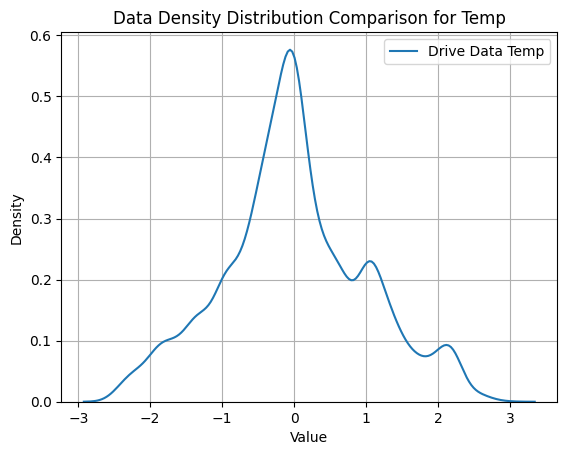

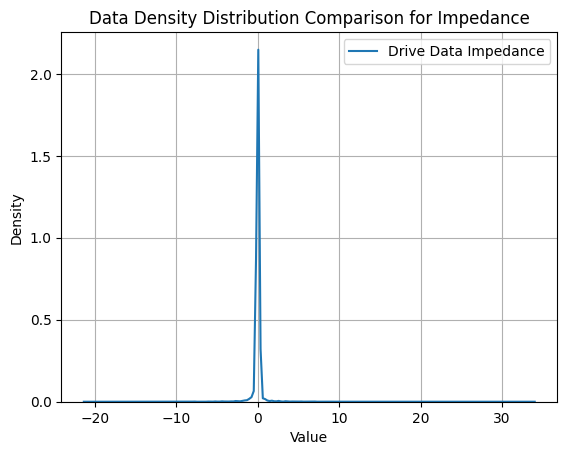

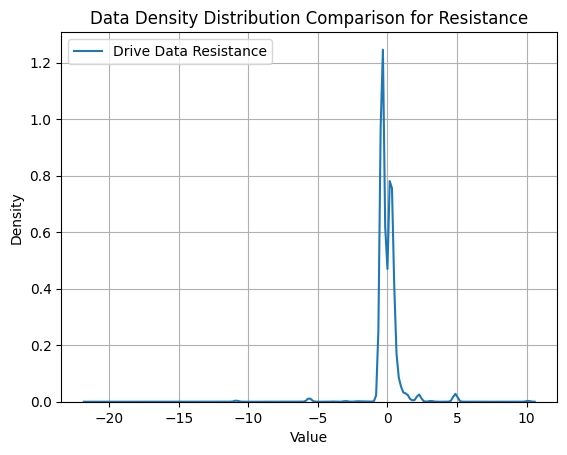

In [12]:
# Density Distribution
for key in ["Curr","Volt","SoC","Temp",'Impedance','Resistance']:
    sns.kdeplot(drive_df[key], label=f"Drive Data {key}", bw_adjust=1)
    plt.xlabel('Value')
    plt.ylabel('Density')
    plt.title(f"Data Density Distribution Comparison for {key}")
    plt.legend()
    plt.grid(True)
    plt.show()

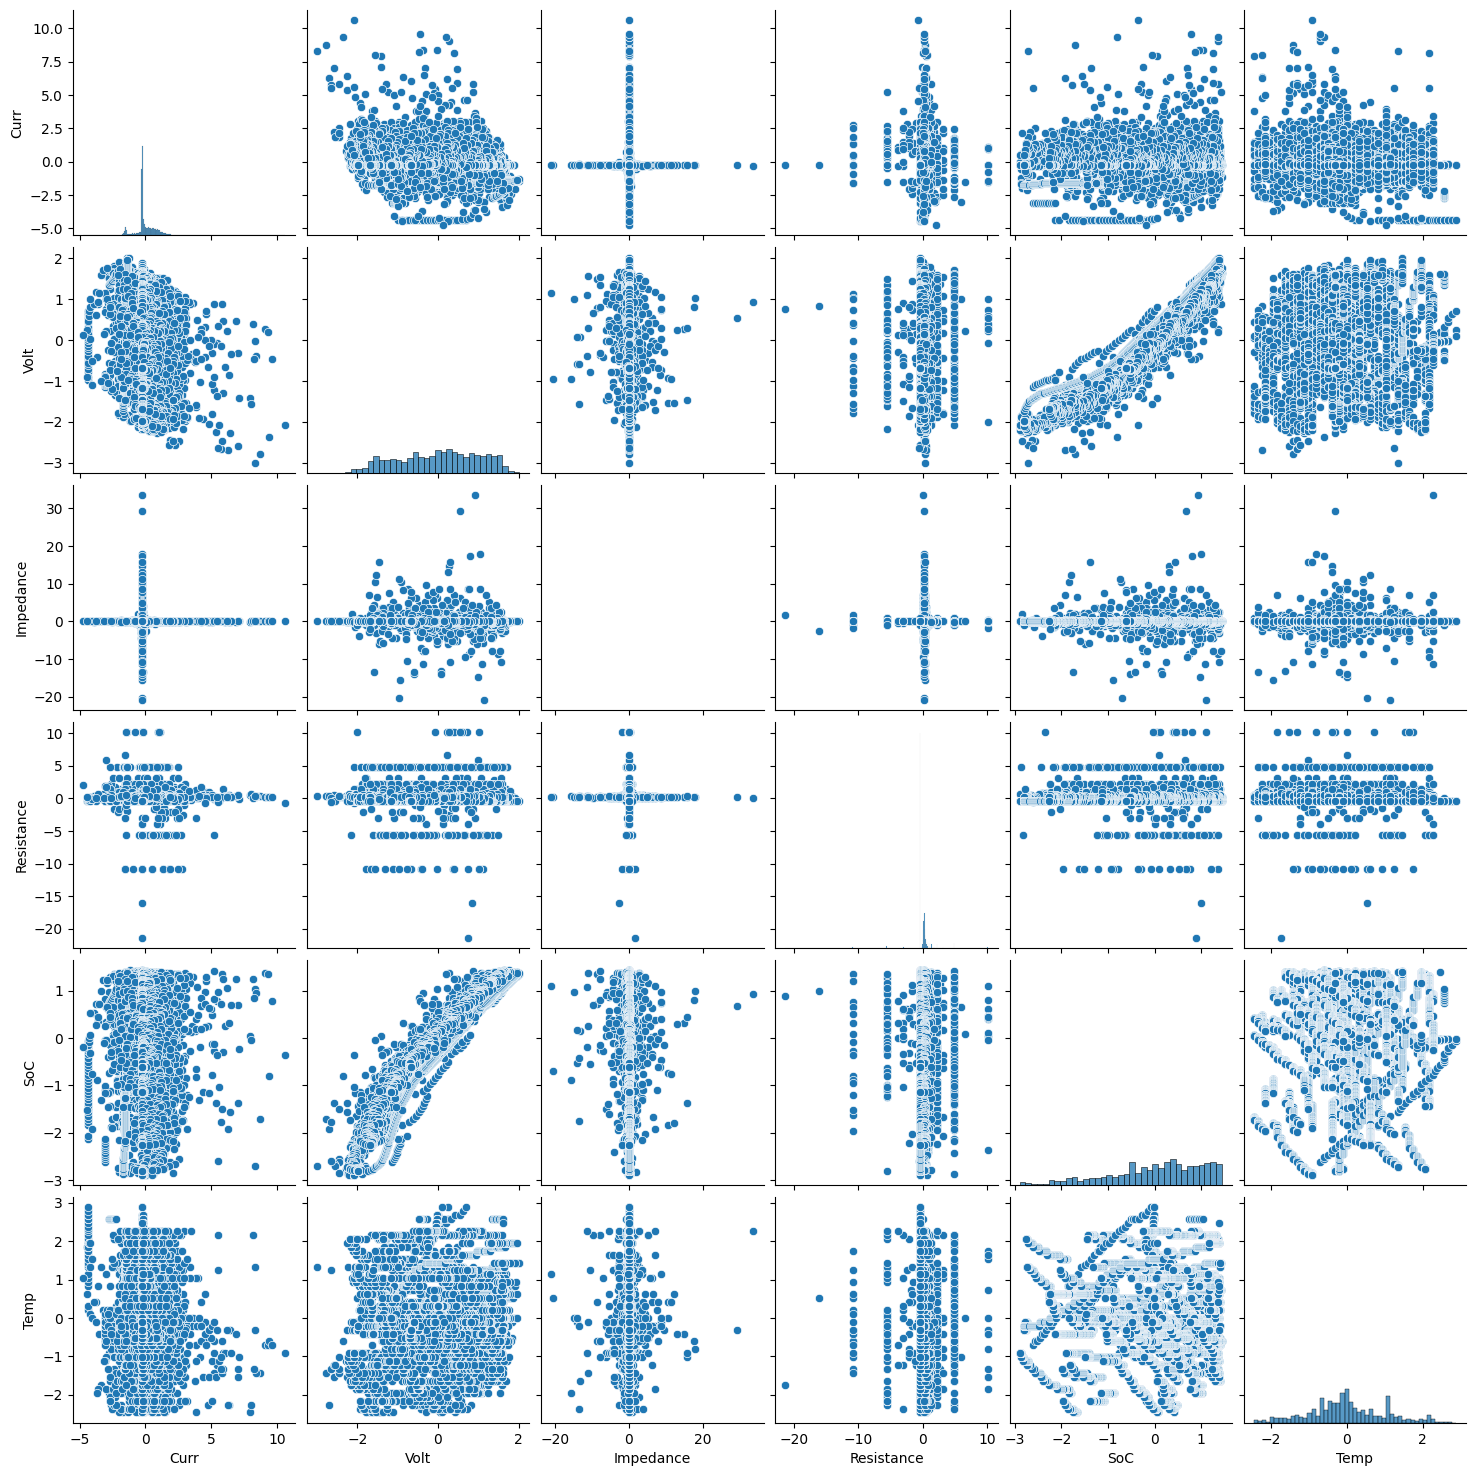

In [13]:
sns.pairplot(drive_df)

<Axes: >

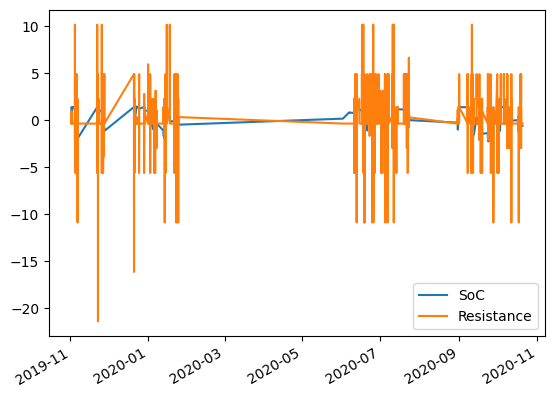

In [14]:
drive_df[["SoC","Resistance"]].plot()

<Axes: >

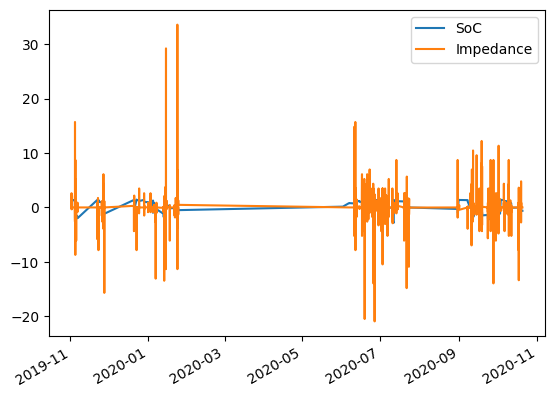

In [16]:
drive_df[["SoC","Impedance"]].plot()